# Hypothesis testing

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# logreturn for ms stocks
ms = pd.DataFrame.from_csv("microsoft.csv")
ms["logReturn"] = np.log(ms["Close"].shift(-1)) - np.log(ms["Close"])

/home/kuanru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


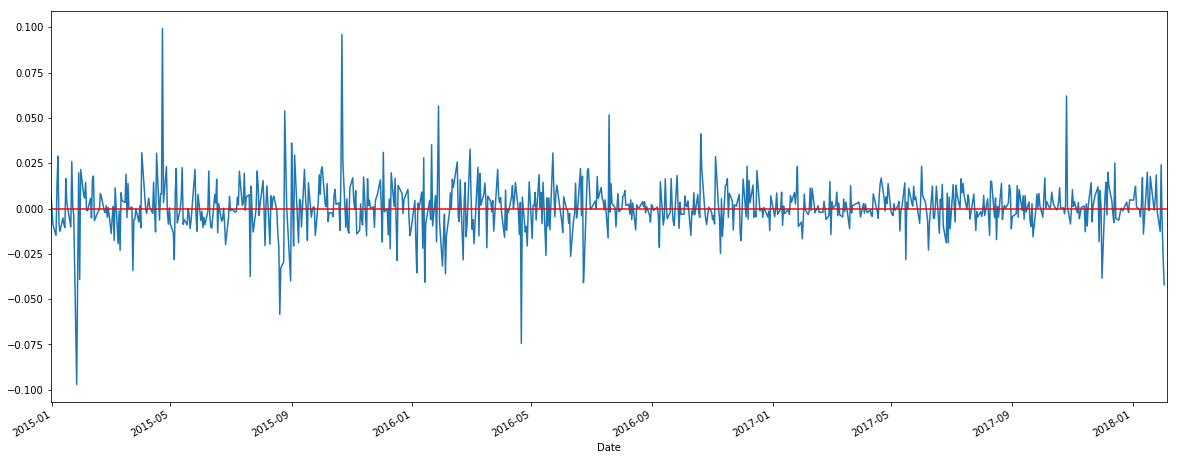

In [6]:
#plot logreturn and one can see the logreturn goes up and down.
ms['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

# Steps for testing a claim by hypothesis testing

## step1 : set hyposis
H0:μ=0   Ha:μ≠0

H0 means the average stock return is 0 H1 means the average stock return is not equal to 0

## stept2 :calculate test statistic

In [13]:
sample_mean = ms["logReturn"].mean()
sample_std = ms["logReturn"].std(ddof=1)
n = ms["logReturn"].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis

zhat = (sample_mean - 0)/(sample_std/n**0.5)
zhat

1.6141477140003688

## step3: set decision criterion

In [15]:
#confidence level
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft # due to symmetric of z-distribution
print(zleft, zright)


-1.9599639845400545 1.9599639845400545


## step4: Make a Choice -- shall we reject H0?

In [16]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: False
